In [1]:
import os
import numpy as np

from skimage.io import imsave, imread
from pathlib import Path

import matplotlib.pyplot as plt
import PIL.Image as Image

from data import *

%load_ext autoreload
%autoreload 2

## look at files

We have 5635 training examples and masks for them. Let's visualize one of them and its mask. Looks like all images have the same size: `(580, 420)`.

In [3]:
data_path = Path.home() / 'data/ultrasound_nerve/'

In [4]:
data_path

PosixPath('/Users/ilyarudyak/data/ultrasound_nerve')

In [14]:
train_data_path = data_path / 'train'

In [15]:
train_data_path

PosixPath('/Users/ilyarudyak/data/ultrasound_nerve/train')

In [11]:
!ls /Users/ilyarudyak/data/ultrasound_nerve/train/ | wc -l

   11270


In [12]:
11270 / 2

5635.0

In [17]:
files = list(train_data_path.glob('*'))

In [18]:
len(files)

11270

In [23]:
files[10]

PosixPath('/Users/ilyarudyak/data/ultrasound_nerve/train/42_91.tif')

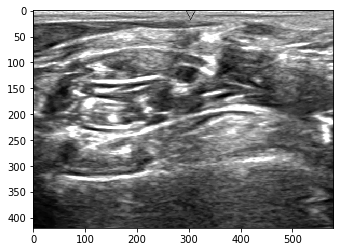

In [64]:
img = Image.open(files[10])
plt.imshow(img, cmap='gray');

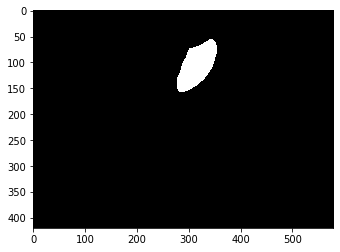

In [65]:
mask = Image.open(str(files[10]).split('.')[0] + '_mask.tif')
plt.imshow(mask, cmap='gray');

In [27]:
img.size

(580, 420)

In [28]:
[Image.open(files[i]).size for i in range(5)]

[(580, 420), (580, 420), (580, 420), (580, 420), (580, 420)]

Let's now try to read files with `skimage`. Looks like this approach doesn't work anymore.

In [ ]:
# filename = '/Users/ilyarudyak/data/ultrasound_nerve/train/42_91.tif'
# img = imread(filename)

Let's now convert this image into `numpy` array.

In [36]:
img_arr = np.array(img)

In [37]:
img_arr.shape

(420, 580)

In [38]:
img_arr = np.array([img])

TypeError: int() argument must be a string, a bytes-like object or a number, not 'TiffImageFile'

In [39]:
img_arr = np.expand_dims(img, axis=2)

In [40]:
img_arr.shape

(420, 580, 1)

##  let's create `.npy` files

In [2]:
create_train_data()

------------------------------
Creating training images...
------------------------------
Done: 0/5635 images
Done: 1000/5635 images
Done: 2000/5635 images
Done: 3000/5635 images
Done: 4000/5635 images
Done: 5000/5635 images
Loading done.
Saving to .npy files done.


In [4]:
!ls ~/data/ultrasound_nerve/

imgs_mask_train.npy  sample_submission.csv  train
imgs_train.npy	     test		    train_masks.csv


In [5]:
imgs_train, imgs_mask_train = load_train_data()

In [6]:
imgs_train.shape, imgs_mask_train.shape

((5635, 420, 580), (5635, 420, 580))

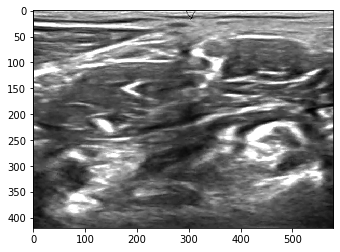

In [7]:
plt.imshow(imgs_train[4], cmap='gray');

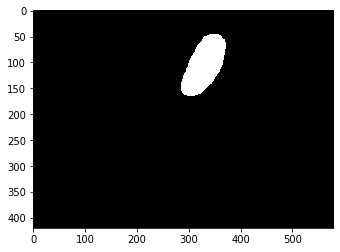

In [8]:
plt.imshow(imgs_mask_train[4], cmap='gray');

So let's try to use this data in our training.

## test data

In [9]:
create_test_data()

------------------------------
Creating test images...
------------------------------
Done: 0/5508 images
Done: 1000/5508 images
Done: 2000/5508 images
Done: 3000/5508 images
Done: 4000/5508 images
Done: 5000/5508 images
Loading done.
Saving to .npy files done.


In [10]:
imgs_test, imgs_id = load_test_data()

In [11]:
imgs_test.shape, imgs_id.shape

((5508, 420, 580), (5508,))

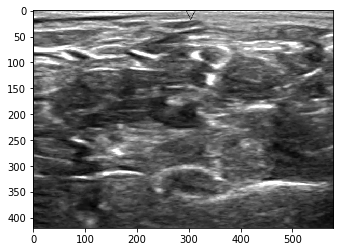

In [12]:
plt.imshow(imgs_test[0], cmap='gray')

In [13]:
imgs_id[:5]

array([2574, 1441, 1823,  236, 3481], dtype=int32)

In [14]:
np.min(imgs_id), np.max(imgs_id)

(1, 5508)